# 使用NLTK进行词性标注

- 用途

1. 给定文本，进行词性标注
2. 对文本簇进行词性统计
3. 查询词性相近的词

In [1]:
# 导入需要的包

import nltk
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [2]:
nltk.help.upenn_tagset() # 查看宾大的标签类别数据集

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [3]:
# 提供一个句子，查看句子的组成的词性

sentence = word_tokenize("I live in Beijing and I love Here")
nltk.pos_tag(sentence)

[('I', 'PRP'),
 ('live', 'VBP'),
 ('in', 'IN'),
 ('Beijing', 'NNP'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('Here', 'RB')]

In [4]:
# 提供一个既可以是名词，也可以是形容词的单词，观察词性标注的结果
sentence = word_tokenize("applicant is removed from applicant list of the job ")
# applicant 在开头是名称，但是在中间则是形容词
nltk.pos_tag(sentence)

[('applicant', 'NN'),
 ('is', 'VBZ'),
 ('removed', 'VBN'),
 ('from', 'IN'),
 ('applicant', 'JJ'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('job', 'NN')]

In [5]:
# 同样类别的例子，两个 allow 分别拥有不同的词性
sentence = word_tokenize("allow us to add lines in list of allow actions")
nltk.pos_tag(sentence)

[('allow', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('add', 'VB'),
 ('lines', 'NNS'),
 ('in', 'IN'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('allow', 'JJ'),
 ('actions', 'NNS')]

In [7]:
# 导入已经分类完成的文本簇与其分类表 brown
# 分类与词性标注不同，分类是从应用层面进行分类，对文本簇的属性进行分类
from nltk.corpus import brown
nltk.download('brown')
brown.categories()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
# brown 中既有标签也有文本簇，且已经完成了标注
# 支持查询选定label中的单词

text_news = nltk.Text(word.lower() for word in nltk.corpus.brown.words(categories='news'))
text_news

<Text: the fulton county grand jury said friday an...>

In [9]:
# 除了查询选定词性的单词之外，也支持对标注的词性进行统计
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
nltk.download('universal_tagset')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

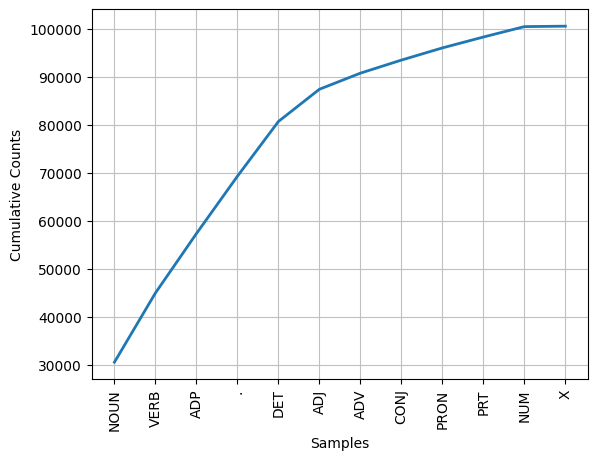

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
tag_fd.plot(cumulative=True)

In [11]:
# 查询词性相近的单词

text_news.similar('man')

meeting ball state house day president team score plan session schools
people person way period salary company corporation game congo


In [12]:
text_news.similar('said')

of in is for expected made that and at added says reported used
thought on asked told given able began


In [13]:
text_news.similar('the')

a his this their its that any an all and some each these one our four
which it washington dallas
